In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Accident_Dataset_2_Top_Reasons.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
df.to_csv("Accident_Dataset_2_Top_Reasons.csv", index = False)

In [11]:
df.drop(df[(df['Reasons'] == "Negligence and lack of attention")].index, inplace=True)

In [ ]:
df.replace(to_replace = "", value = "", inplace = True)

In [12]:
df["Reasons"].value_counts()

Preoccupation with the road while driving the vehicle in any way    628
Sudden deviation                                                    316
Name: Reasons, dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 3 to 2106
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Fake ID              944 non-null    int64 
 1   Year                 944 non-null    int64 
 2   City                 944 non-null    object
 3   Month                944 non-null    object
 4   Day                  944 non-null    object
 5   Time                 944 non-null    object
 6   Week                 944 non-null    object
 7   Type Of Accident     944 non-null    object
 8   Reasons              944 non-null    object
 9   Street               944 non-null    object
 10  Place                944 non-null    object
 11  Area                 944 non-null    object
 12  Location             944 non-null    object
 13  Lighting             944 non-null    object
 14  Road Condition       944 non-null    object
 15  Weather Condition    944 non-null    object
 16  Road su

<AxesSubplot:xlabel='Degree of injury', ylabel='Count'>

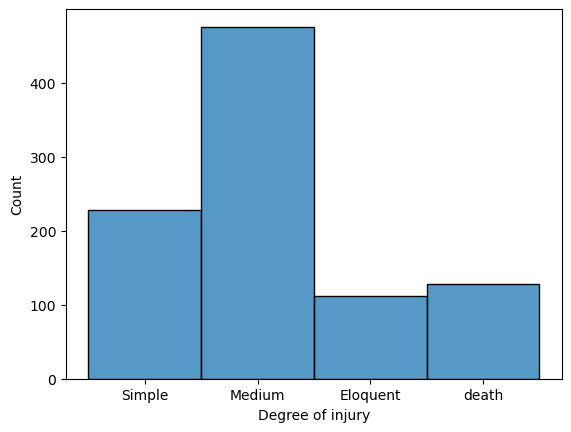

In [28]:
sns.histplot(data = df, x = "Degree of injury")

In [ ]:
df.replace("Eloquent", "Fatal", inplace = True)

In [ ]:
df.drop(df[(df['Reasons'] == "Overcoming the red light signal - the arrow signal")].index, inplace=True)

0       No Clouds
1       No Clouds
2       No Clouds
3       No Clouds
4       No Clouds
          ...    
2102    No Clouds
2103    No Clouds
2104        dusty
2105    No Clouds
2106    No Clouds
Name: Weather Condition, Length: 2107, dtype: object

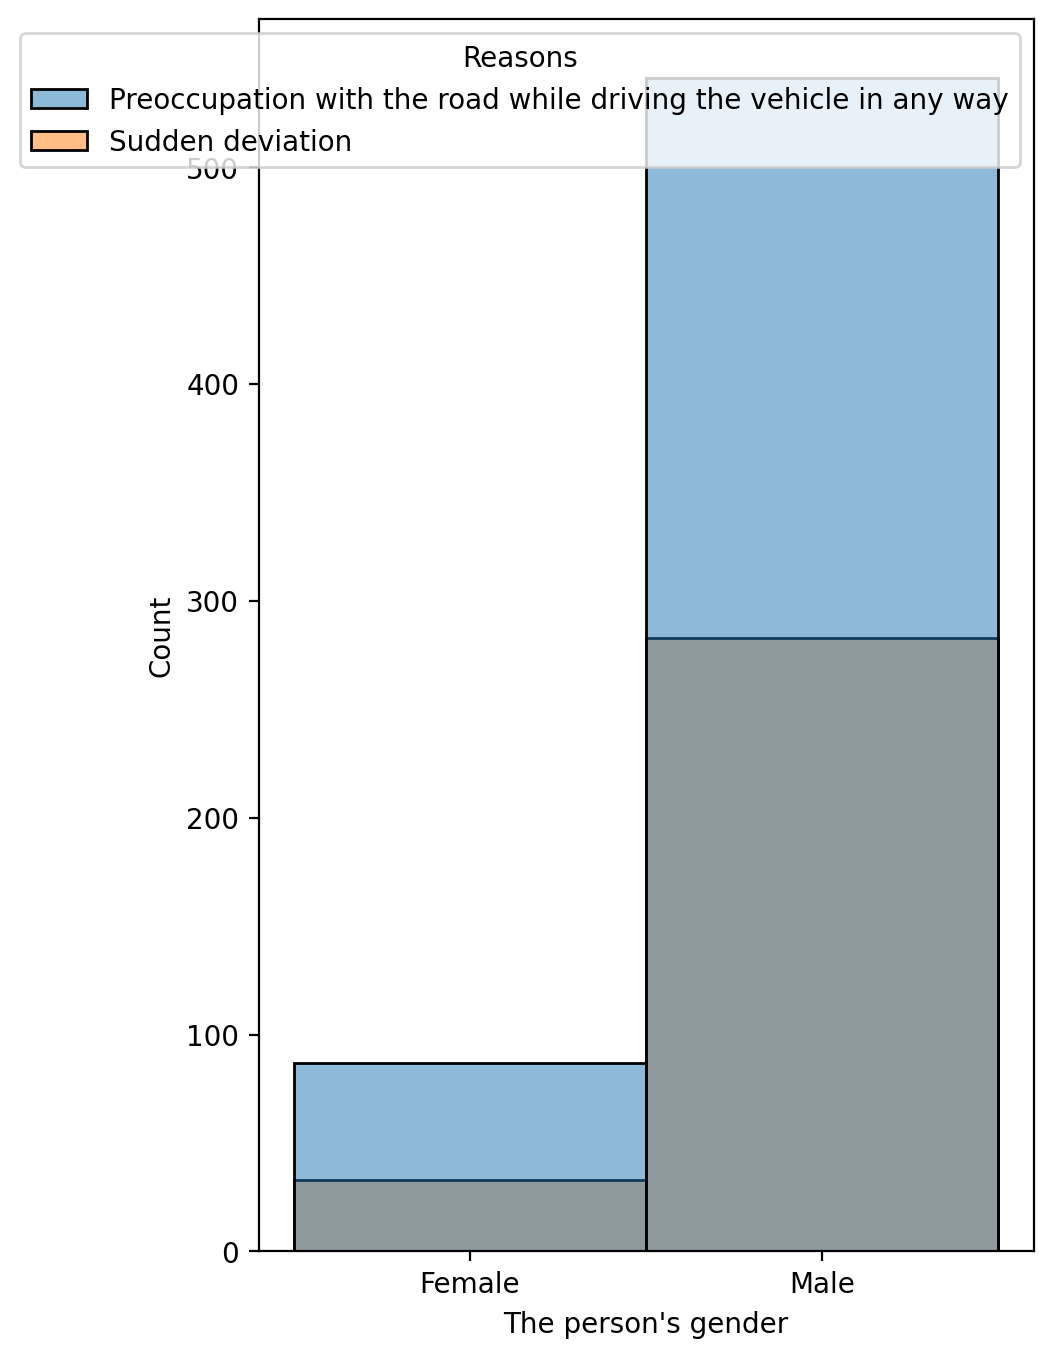

In [33]:
from matplotlib.pyplot import figure 
figure(figsize = (5, 8), dpi=200)
sns.histplot(data = df, x = "The person's gender", hue = "Reasons");

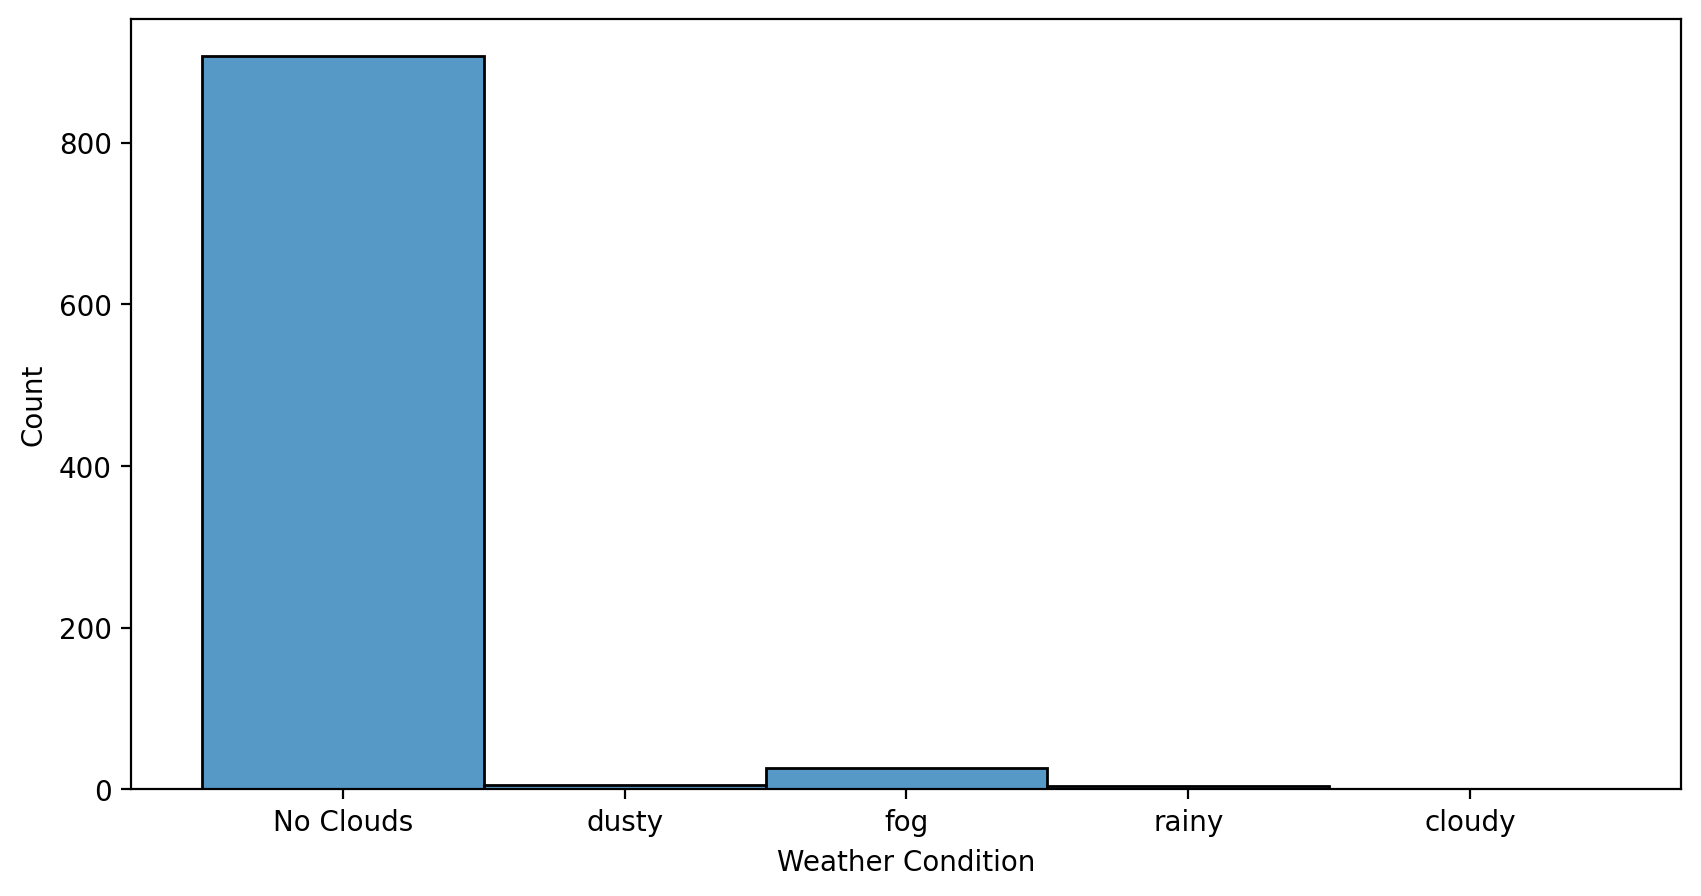

In [35]:
figure(figsize=(10, 5), dpi=200)

sns.histplot(data = df, x = "Weather Condition");

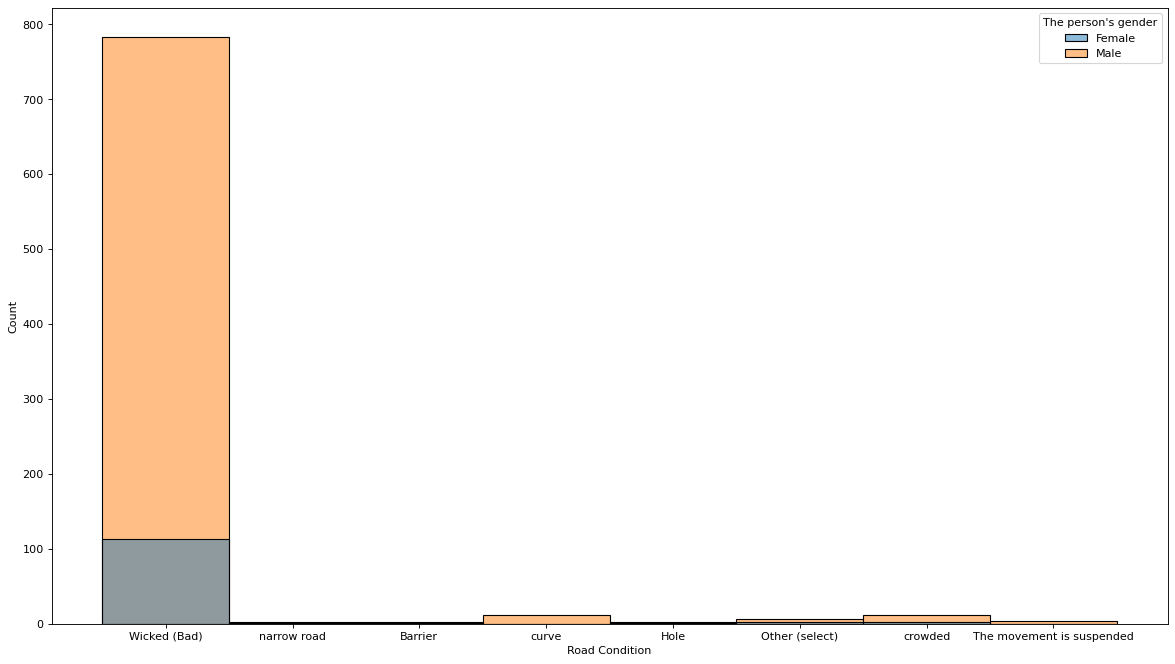

In [16]:
from matplotlib.pyplot import figure

figure(figsize=(18, 10), dpi=80)
sns.histplot(data = df, x = "Road Condition", hue = "The person's gender");

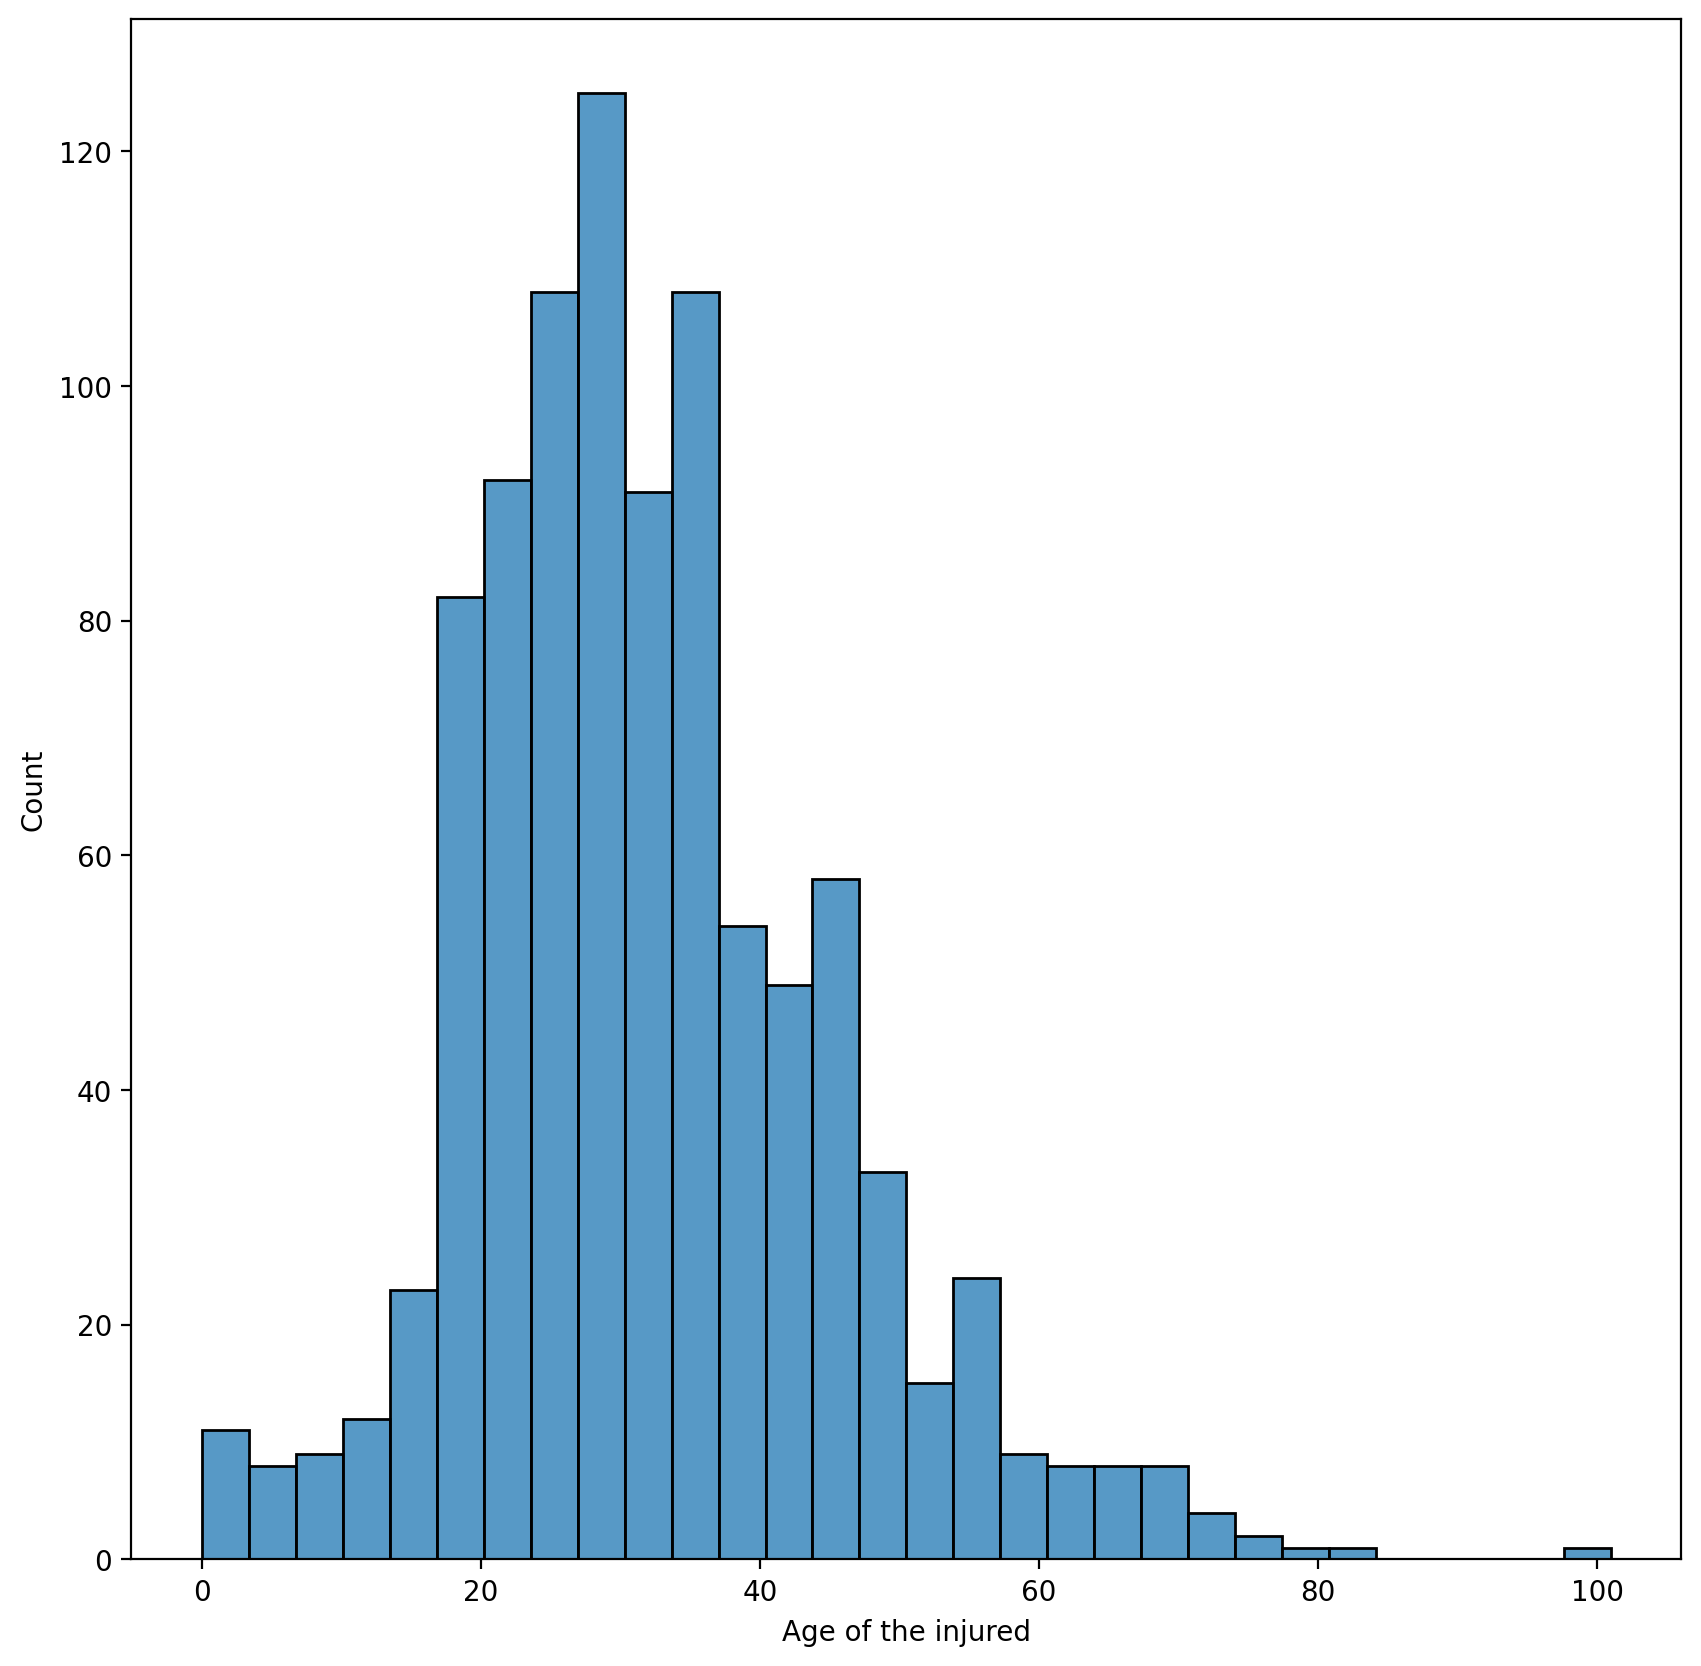

In [17]:
figure(figsize = (10, 10), dpi = 200)
sns.histplot(data = df, x = "Age of the injured");

In [18]:
from sklearn import tree
from sklearn.model_selection import train_test_split
clf = tree.DecisionTreeClassifier()
X = df.drop(columns = ["Type Of Accident", "Time", "Fake ID", "Place", "Area", "Location", "Year", "City", "Month", "Day", "Week", "Street", "Lay injured", "Injured seat", "Degree of injury", "Age of the injured", "Total", "Reasons"])
y = df["Reasons"]

In [19]:
# Turning categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Which columns to make into numbers
categorical_features = ["Lighting", 
"Road Condition", "Weather Condition", "Road surface", 
"The person's gender", "Pedestrian behavior", "Intersection"]

one_hot = OneHotEncoder(sparse = False)
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                 categorical_features)],
                               remainder = "passthrough")

transformed_X = transformer.fit_transform(X)
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,40.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,80.0,2.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,80.0,3.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,80.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,60.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,60.0,3.0
940,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,160.0,4.0
941,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,60.0,2.0
942,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,120.0,3.0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2, random_state = 101)

In [21]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
predictions = clf.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
clf.score(X_test, y_test)

0.7566137566137566

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))

print(confusion_matrix(y_test, predictions))

                                                                  precision    recall  f1-score   support

Preoccupation with the road while driving the vehicle in any way       0.82      0.82      0.82       131
                                                Sudden deviation       0.60      0.60      0.60        58

                                                        accuracy                           0.76       189
                                                       macro avg       0.71      0.71      0.71       189
                                                    weighted avg       0.76      0.76      0.76       189

[[108  23]
 [ 23  35]]


In [25]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import graphviz

In [27]:
# dot_data = StringIO()
# export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = None)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png("Tree.png")
# Image(graph.create_png())

# New Section

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rfc = RandomForestClassifier(n_estimators = 300)

In [83]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [84]:
rfc_pred = rfc.predict(X_test)

In [85]:
rfc.score(X_test, y_test)

0.7671957671957672

In [86]:
Month_count = df["Month"].value_counts()

In [87]:
Month_count

October      104
February      97
May           88
Dec           88
January       88
June          84
November      83
March         77
August        65
September     63
April         54
July          53
Name: Month, dtype: int64

In [88]:
df["Reasons"].value_counts()

Preoccupation with the road while driving the vehicle in any way    628
Sudden deviation                                                    316
Name: Reasons, dtype: int64

In [89]:
s = pd.Series(data=np.arange(3), index=['A', 'B', 'C'])

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 3 to 2106
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Fake ID              944 non-null    int64 
 1   Year                 944 non-null    int64 
 2   City                 944 non-null    object
 3   Month                944 non-null    object
 4   Day                  944 non-null    object
 5   Time                 944 non-null    object
 6   Week                 944 non-null    object
 7   Type Of Accident     944 non-null    object
 8   Reasons              944 non-null    object
 9   Street               944 non-null    object
 10  Place                944 non-null    object
 11  Area                 944 non-null    object
 12  Location             944 non-null    object
 13  Lighting             944 non-null    object
 14  Road Condition       944 non-null    object
 15  Weather Condition    944 non-null    object
 16  Road su

In [91]:
df.drop(df[(df['Reasons'] == "Overcoming the red light signal - the arrow signal")].index, inplace=True)

In [92]:
df["Reasons"].value_counts()

Preoccupation with the road while driving the vehicle in any way    628
Sudden deviation                                                    316
Name: Reasons, dtype: int64